In [1]:
import allel
import h5py  # Python Package to do the HDF5.
import numpy as np
import pandas as pd
import socket
import os

socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name[:7] == "midway2":
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/git/hapBLOCK/"  # The Path on Midway Cluster
elif socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

from python.modify_h5 import ModifyHDF5Genotypes

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns

compute-a-16-128.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


# Downsample Simulated 1000G Genotypes to 0.5x of all 1240K SNPs. 
Add 0.99 uncertainty about genotypes. Takes about 5 sec per 200 ind hdf5

In [ ]:
%%time
ls = [0, 4, 8, 12, 16, 20]

for l in ls:
    ch = 3
    in_path = f"./output/simulated/TSI/ch3_{l}cm/sim_ch{ch}.h5" # The default dataset
    out_path = f"./output/simulated/TSIs05/ch3_{l}cm/sim_ch{ch}.h5"

    # Make Directory if not already there
    if not os.path.exists(os.path.dirname(out_path)):   
        os.makedirs(os.path.dirname(out_path))
        print(f"Creaded dir: {out_path}")

    #os.remove(save_path)  # For previous whoopsie
    m = ModifyHDF5Genotypes(original_path=in_path, save_path=out_path)
    m.downsample_gt(frac=1.0, ad=False, gp=True, 
                    mult_alt=False, gt_type="int8", 
                    shuffle_cm=0.5, cty=0.99, compression="gzip")
    m.copy_ibdinfo()

# Add error to Genotypes

In [3]:
%%time
ls = [0, 4, 8, 12, 16, 20]

for l in ls:
    ch = 3
    in_path = f"./output/simulated/TSI07s05/ch3_{l}cm/sim_ch{ch}.h5"
    out_path = f"./output/simulated/TSI07s05e1/ch3_{l}cm/sim_ch{ch}.h5"

    # Make Directory if not already there
    if not os.path.exists(os.path.dirname(out_path)):   
        os.makedirs(os.path.dirname(out_path))
        print(f"Creaded dir: {out_path}")

    #os.remove(save_path)  # For previous whoopsie
    m = ModifyHDF5Genotypes(original_path=in_path, save_path=out_path)
    m.downsample_gt(frac=1.0, ad=False, gp=True, mult_alt=False, gt_type="int8", 
                    shuffle_cm=0, cty=0.99, error=0.01, compression="gzip")
    m.copy_ibdinfo()

Heyho back old friend. I started running
Loaded HDF5
Loaded 54468 variants
Loaded 200 individuals
['GP', 'GT']
['ALT', 'MAP', 'POS', 'REF']
Fraction Loci surviving 1.000000
Successfully saved 200 individuals to: ./output/simulated/TSI07s05e1/ch3_0cm/sim_ch3.h5
Creaded dir: ./output/simulated/TSI07s05e1/ch3_4cm/sim_ch3.h5
Heyho back old friend. I started running
Loaded HDF5
Loaded 54432 variants
Loaded 200 individuals
['GP', 'GT']
['ALT', 'MAP', 'POS', 'REF']
Fraction Loci surviving 1.000000
Successfully saved 200 individuals to: ./output/simulated/TSI07s05e1/ch3_4cm/sim_ch3.h5
Creaded dir: ./output/simulated/TSI07s05e1/ch3_8cm/sim_ch3.h5
Heyho back old friend. I started running
Loaded HDF5
Loaded 54554 variants
Loaded 200 individuals
['GP', 'GT']
['ALT', 'MAP', 'POS', 'REF']
Fraction Loci surviving 1.000000
Successfully saved 200 individuals to: ./output/simulated/TSI07s05e1/ch3_8cm/sim_ch3.h5
Creaded dir: ./output/simulated/TSI07s05e1/ch3_12cm/sim_ch3.h5
Heyho back old friend. I start

# Test hdf5
Test whether one can load the simulated hdf5

In [21]:
path = "/n/groups/reich/hringbauer/git/hapBLOCK/output/simulated/TSIs05/ch3_20cm/sim_ch3.h5"
f = h5py.File(path, "r") # Load for Sanity Check. See below!
        
print("Loaded HDF5")
#print("Loaded %i variants" % np.shape(f["calldata/AD"])[0])
#print("Loaded %i individuals" % np.shape(f["calldata/AD"])[1])
print(list(f["calldata"].keys()))
print(list(f["variants"].keys()))

Loaded HDF5
['GP', 'GT']
['ALT', 'MAP', 'POS', 'REF']


In [7]:
np.shape(f["calldata/GT"])

(77652, 200, 2)

In [5]:
f["calldata/GT"][:10, 104, :]

array([[0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0]], dtype=int8)

In [6]:
f["calldata/GP"][:10, 104, :]

array([[0.99 , 0.005, 0.005],
       [0.005, 0.99 , 0.005],
       [0.005, 0.99 , 0.005],
       [0.99 , 0.005, 0.005],
       [0.99 , 0.005, 0.005],
       [0.99 , 0.005, 0.005],
       [0.99 , 0.005, 0.005],
       [0.005, 0.99 , 0.005],
       [0.99 , 0.005, 0.005],
       [0.99 , 0.005, 0.005]], dtype=float32)

In [ ]:
f.close()

In [18]:
import sys as sys

In [20]:
sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")  # hack to get development package first in path
from hapBLOCK.IO.h5_load import get_opp_homos_f, get_genos_pairs

In [24]:
g1, g2, m = get_genos_pairs(f, sample1='iid3A', sample2='iid3B')

Filtering to 0.98 GP variants: 1.000x
Filtering to 0.98 GP variants: 1.000x
Filtering to common GP variants: 1.000x


In [28]:
get_opp_homos_f("/n/groups/reich/hringbauer/git/hapBLOCK/output/simulated/TSIs05/ch3_20cm/sim_ch", ch=3, iid1='iid3A', iid2='iid3B')

Filtering to 0.99 GP variants: 0.000x
Filtering to 0.99 GP variants: 0.000x
Filtering to common GP variants: 0.000x


(array([], dtype=bool), array([], dtype=float32))

## Experiment with shuffling phase

In [139]:
def shuffle_haplos(gts, rec, scale_cm=0.5):
    """Shuffle genotypes with random waiting times 
    (mean scale in cM, exponentially distributed)"""
    m = np.max(rec)
    l = np.shape(gts)[0] # nr of loci
    n = np.shape(gts)[1] # Nr individuals
    scale_m = scale_cm/100.0
    k = int(m/scale_m * 5) # Five times overshooting to be sure...
    
    w = np.random.exponential(scale=scale_m, size=(n,k))
    w = np.cumsum(w, axis=1) # Get swapping points
    idx = np.searchsorted(rec, w) # Get swapping indices 
    
    gts_new = np.copy(gts)
    # Iterate over all individuals and all swap points
    for i in range(n):
        for j in range(0,k-1,2):
            a,b= idx[i,j], idx[i,j+1]
            if a>=l:
                break
            gts_new[a:b,i,1] = gts[a:b,i,0]
            gts_new[a:b,i,0] = gts[a:b,i,1]
    assert((np.sum(gts, axis=2) == np.sum(gts_new, axis=2)).all()) # Sanity check
    return gts_new

In [216]:
gts = np.zeros((10000,200,2))
gts[:,:,0] = 1
m = np.linspace(0,100,10001)[:10000]/100

In [224]:
%%time
gts1 = shuffle_haplos(gts, rec=m, scale_cm=0.5)

CPU times: user 184 ms, sys: 37.4 ms, total: 221 ms
Wall time: 219 ms


In [218]:
np.shape(gts1)

(10000, 200, 2)

In [219]:
import matplotlib.pyplot as plt

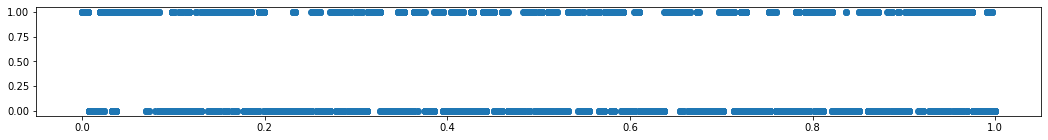

In [225]:
i=100
x1 = gts1[:,i,0]
x2 = gts1[:,i,1]

plt.figure(figsize=(18,2))

ax = plt.gca()
ax.plot(m, x1, "o")
#ax.plot(np.arange(len(x2)),x2, "ro")
plt.show()

In [226]:
jumps = np.abs(gts1[1:,:,1] - gts1[:-1,:,1])

In [222]:
np.shape(jumps)

(9999, 200)

In [227]:
np.mean(jumps)

0.01956245624562456

In [192]:
np.mean(jumps[1])

0.165

In [193]:
1/0.16435935935935936

6.084229117817229